In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from mplsoccer.pitch import Pitch

In [2]:
philly = pd.read_json('/Users/elliottlevy/Downloads/2021-11-20 21-30 United States of America Major League Soccer Male 2021 Philadelphia Union New York Red Bull.json')

In [5]:
philly_philly = philly[philly['team'] == {'id': 496, 'name': 'Philadelphia Union'}]

In [17]:
philly_philly_setpiece = philly_philly.loc[(philly_philly['play_pattern'] == {'id': 3, 'name': 'From Free Kick'}) | (philly_philly['team'] =={'id': 2, 'name': 'From Corner'})]







In [21]:
set([x['name'] for x in philly_philly_setpiece['type']])

{'Bad Behaviour',
 'Ball Receipt*',
 'Ball Recovery',
 'Block',
 'Carry',
 'Clearance',
 'Dispossessed',
 'Dribble',
 'Duel',
 'Foul Committed',
 'Foul Won',
 'Goal Keeper',
 'Half End',
 'Half Start',
 'Injury Stoppage',
 'Interception',
 'Miscontrol',
 'Pass',
 'Player Off',
 'Pressure',
 'Shield',
 'Shot',
 'Substitution'}

In [68]:
list(philly_philly_setpiece['type'])

[{'id': 9, 'name': 'Clearance'},
 {'id': 9, 'name': 'Clearance'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 43, 'name': 'Carry'},
 {'id': 30, 'name': 'Pass'},
 {'id': 30, 'name': 'Pass'},
 {'id': 30, 'name': 'Pass'},
 {'id': 4, 'name': 'Duel'},
 {'id': 2, 'name': 'Ball Recovery'},
 {'id': 43, 'name': 'Carry'},
 {'id': 14, 'name': 'Dribble'},
 {'id': 43, 'name': 'Carry'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 43, 'name': 'Carry'},
 {'id': 30, 'name': 'Pass'},
 {'id': 17, 'name': 'Pressure'},
 {'id': 17, 'name': 'Pressure'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 4, 'name': 'Duel'},
 {'id': 4, 'name': 'Duel'},
 {'id': 28, 'name': 'Shield'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 30, 'name': 'Pass'},
 {'id': 42, 'name': 'Ball Receipt*'},
 {'id': 30, 'name': 'Pass'},
 {'id': 30, 'name

In [24]:
shot = philly_philly_setpiece[philly_philly_setpiece['type'] == {'id': 16, 'name': 'Shot'}]

In [30]:
player_shot = [x['name'] for x in shot['player']]
location_shot = [x for x in shot['location']]
xg_shot = [x['statsbomb_xg'] for x in shot['shot']]


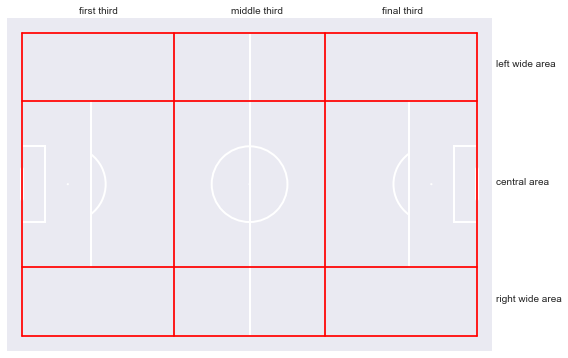

In [78]:
formationpitch6 = Pitch(pitch_type = 'statsbomb', positional_color='#9A9A9A')
fig, ax = formationpitch6.draw()
plt.plot((0,0),(0,80), c ='r')
plt.plot((0,120),(80,80), c ='r')
plt.plot((0,120),(0,0), c='r')
plt.plot((120,120),(0,80), c='r')
plt.plot((40,40),(0,80), c='r')
plt.plot((80,80),(0,80), c='r')
plt.plot((0,120),(18,18), c='r')
plt.plot((0,120),(62,62), c='r')
plt.text(15, -5, "first third", size = 'medium')
plt.text(55, -5, "middle third", size = 'medium')
plt.text(95, -5, "final third", size = 'medium')
plt.text(125, 9, "left wide area", size = 'medium')
plt.text(125, 40, "central area", size = 'medium')
plt.text(125, 71, "right wide area", size = 'medium')
plt.savefig(f'{opponent} Legend.png') 

In [41]:
xg_x = []
xg_y = []

for i in range(len(location_shot)):
    if location_shot[i] != 0:
        xg_x.append(location_shot[i][0])
        xg_y.append(location_shot[i][1])
    else:
        pass

df3 = pd.DataFrame(xg_x, columns=['x'])
df3['y'] = xg_y
nan_value = float("NaN")
df3.replace("", nan_value, inplace=True)
df3.dropna(inplace=True)
df3['xg'] = xg_shot
df3['player'] = player_shot

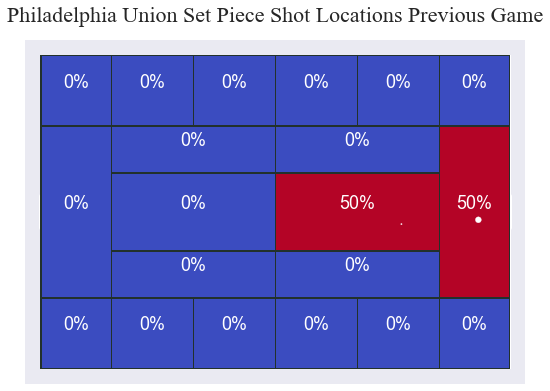

In [72]:
opponent = 'Philadelphia Union'

pitch = Pitch(pitch_type = 'statsbomb', positional_color='#9A9A9A')
fig, ax = pitch.draw()
position = 'full'
bin_statistic = pitch.bin_statistic_positional(df3.x, df3.y, statistic='count', positional=position)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
pitch.scatter(df3.x, df3.y, c='white', s=(df3['xg'])*100, ax=ax)
total = np.array([bs['statistic'].sum() for bs in bin_statistic]).sum()
for bs in bin_statistic:
        bs['statistic'] = (pd.DataFrame(bs['statistic'] / total)
                           .applymap(lambda x: '{:.0%}'.format(x))
                           .values)
pitch.label_heatmap(bin_statistic, color='white', fontsize=18, ax=ax, ha='center', va='bottom')
title = fig.suptitle(f'{opponent} Set Piece Shot Locations Previous Game', x=0.5, y=0.98, fontsize=22, fontname="Times New Roman")
plt.tight_layout()
plt.savefig(f'{opponent} Shot Locations Previous Game.png')   

In [43]:
df3

,x,y,xg,player
0,112.0,42.0,0.353143,Cory Burke
1,92.3,43.1,0.017617,Jakob Glesnes


In [53]:
passs = philly_philly_setpiece[philly_philly_setpiece['type'] == {'id': 30, 'name': 'Pass'}]
player_pass = [x['name'] for x in passs['player']]
location_pass = [x for x in passs['location']]
endlocation_pass = [x['end_location'] for x in passs['pass']]
sb_to_yards = (((8/9)**2 + (17/20)**2)**0.5) / (2**0.5) 
pass_length = [x['length'] * sb_to_yards for x in passs['pass']]


In [55]:
start = []
end = []

for i in range(len(location_pass)):
    try:
        start.append(location_pass[i])
        end.append(endlocation_pass[i])
    except:
        pass
    
keystart_x = []
keystart_y = []
keyend_x = []
keyend_y = []

for i in range(len(start)):
    keystart_x.append(start[i][0])
    keystart_y.append(start[i][1])
    keyend_x.append(end[i][0])
    keyend_y.append(end[i][1])

key_df = pd.DataFrame({'start_x':keystart_x, 'start_y':keystart_y, 'end_x': keyend_x, 'end_y': keyend_y})

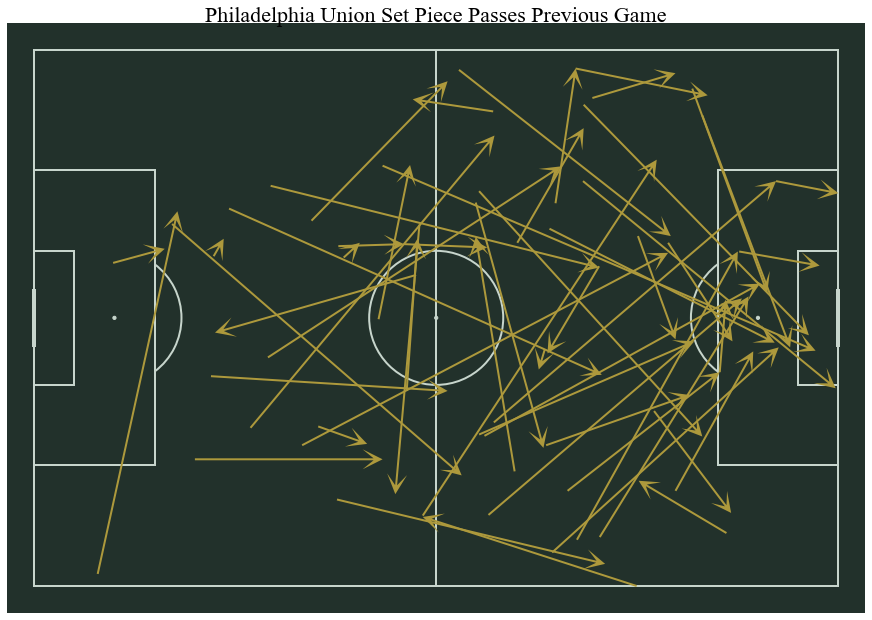

In [56]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(12, 9),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

pitch.arrows(key_df.start_x, key_df.start_y, key_df.end_x, key_df.end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label="key passes")
title = fig.suptitle(f'{opponent} Set Piece Passes Previous Game', x=0.5, y=0.98, fontsize=22, fontname="Times New Roman")
plt.savefig(f'{opponent} Key Passes.png')
#pitch.scatter(keyend_x, keyend_y, c='red', s=5, ax=ax)

In [58]:
pass_type_list = []
passes = [x for x in passs['pass']]

for i in range(len(passes)):
    pass_type_list.append(passes[i]['height']['name'])
    
pass_type, frequency = np.unique(pass_type_list, return_counts = True)
p1 = pd.DataFrame({'pass_type':pass_type, 'frequency':frequency})
p1.to_csv(f'{opponent} pass_type.csv', index=False)

<Figure size 3600x1440 with 0 Axes>

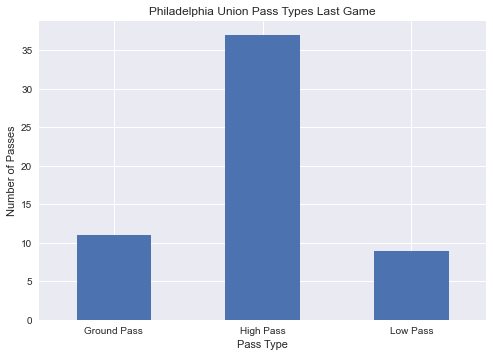

In [59]:
style.use('seaborn')
plt.figure(figsize = (50,20))
p1.plot(kind='bar',legend=None)
x1_axis = np.arange(len(p1))
tick1_locations = [value for value in x1_axis]
plt.xticks(tick1_locations, p1['pass_type'], rotation='horizontal')
plt.title(f"{opponent} Pass Types Last Game")
plt.xlabel("Pass Type")
plt.ylabel("Number of Passes")
plt.savefig(f'{opponent} Pass Types.png')  
plt.show()

In [61]:
pass_length_series = pd.Series(pass_length)
hammer = round(pass_length_series.describe(),2)
anvil = pd.DataFrame(hammer)
anvil = anvil.rename(columns = {0:'pass_length_meters'}).copy()
anvil.to_csv(f'{opponent} pass_length_data.csv', index=True)

In [62]:
anvil

,pass_length_meters
count,57.00
mean,27.89
std,15.67
min,2.61
25%,14.25
50%,28.26
75%,41.82
max,61.09


In [70]:
recovery = philly_philly_setpiece.loc[(philly_philly_setpiece['type'] == {'id': 2, 'name': 'Ball Recovery'}) | (philly_philly_setpiece['type'] == {'id': 4, 'name': 'Duel'}) | (philly_philly_setpiece['type'] == {'id': 17, 'name': 'Pressure'})]
                                                                                                                
                                                                                                                
                                                                                                                

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,foul_committed,interception,miscontrol,ball_recovery,foul_won,bad_behaviour,substitution,block,injury_stoppage,50_50
1089,7c3a0b0a-b94a-49cc-92ba-3ab8e847cbe5,1090,1,2022-01-08 00:31:20.155,31,20,"{'id': 4, 'name': 'Duel'}",65,"{'id': 496, 'name': 'Philadelphia Union'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,4554128a-69fc-49fb-866b-2bc0a346f469,1092,1,2022-01-08 00:31:22.223,31,22,"{'id': 2, 'name': 'Ball Recovery'}",65,"{'id': 496, 'name': 'Philadelphia Union'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,7b0b749d-785c-4e6b-9228-bdd20d42bf74,1102,1,2022-01-08 00:31:35.138,31,35,"{'id': 17, 'name': 'Pressure'}",65,"{'id': 496, 'name': 'Philadelphia Union'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,ac975100-b31b-4668-add2-fa61a30a6ebe,1110,1,2022-01-08 00:32:22.225,32,22,"{'id': 17, 'name': 'Pressure'}",67,"{'id': 387, 'name': 'New York Red Bulls'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,dd42940c-c141-4db2-988b-bad9fd1e89ee,1194,1,2022-01-08 00:34:29.824,34,29,"{'id': 4, 'name': 'Duel'}",73,"{'id': 496, 'name': 'Philadelphia Union'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,e3c2534e-4e88-41fc-aa0e-0c88702cf4d7,1196,1,2022-01-08 00:34:32.024,34,32,"{'id': 4, 'name': 'Duel'}",73,"{'id': 496, 'name': 'Philadelphia Union'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1262,3bdfc952-e89f-4096-ad63-3ac65491b5b3,1263,1,2022-01-08 00:37:36.654,37,36,"{'id': 4, 'name': 'Duel'}",79,"{'id': 387, 'name': 'New York Red Bulls'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1264,0efeb406-1cef-4105-a576-217e0c4efb65,1265,1,2022-01-08 00:37:38.297,37,38,"{'id': 17, 'name': 'Pressure'}",79,"{'id': 387, 'name': 'New York Red Bulls'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1270,a78f81b5-6418-43c0-8b94-47c8afc64df1,1271,1,2022-01-08 00:37:42.123,37,42,"{'id': 17, 'name': 'Pressure'}",79,"{'id': 387, 'name': 'New York Red Bulls'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,2d92fc6b-7201-4c08-8c02-b3acbeaaae91,1300,1,2022-01-08 00:39:23.933,39,23,"{'id': 17, 'name': 'Pressure'}",82,"{'id': 387, 'name': 'New York Red Bulls'}","{'id': 3, 'name': 'From Free Kick'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
player_recovery = [x['name'] for x in recovery['player']]
location_recovery = [x for x in recovery['location']]

recovery_x = []
recovery_y = []

for i in range(len(location_recovery)):
    if location_recovery[i] != 0:
        recovery_x.append(location_recovery[i][0])
        recovery_y.append(location_recovery[i][1])
    else:
        pass

df5 = pd.DataFrame(recovery_x, columns=['x'])
df5['y'] = recovery_y
nan_value = float("NaN")
df5.replace("", nan_value, inplace=True)
df5.dropna(inplace=True)
df5['player'] = player_recovery

In [75]:
df5

,x,y,player
0,111.1,44.4,Jakob Glesnes
1,106.8,62.0,Alejandro Bedoya
2,92.9,16.4,Jakob Glesnes
3,17.8,24.1,Jack Elliott
4,99.7,57.7,Kacper Przybyłko
5,105.5,59.4,Alejandro Bedoya
6,52.0,61.1,Kacper Przybyłko
7,38.8,66.7,José Andrés Martínez Torres
8,27.4,61.1,José Andrés Martínez Torres
9,53.7,30.1,Paxten Aaronson


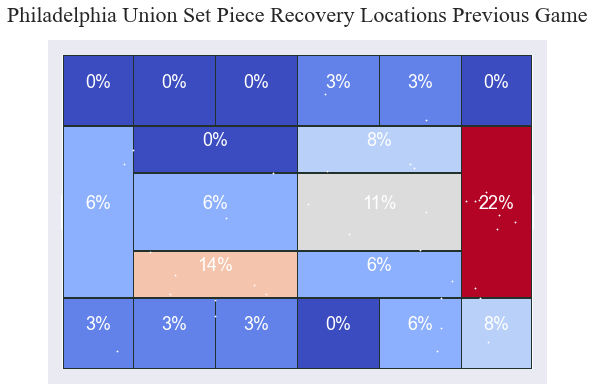

In [77]:
pitch = Pitch(pitch_type = 'statsbomb', positional_color='#9A9A9A')
fig, ax = pitch.draw()
position = 'full'
bin_statistic = pitch.bin_statistic_positional(df5.x, df5.y, statistic='count', positional=position)
pitch.heatmap_positional(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
pitch.scatter(df5.x, df5.y, c='white', s=2, ax=ax)
total = np.array([bs['statistic'].sum() for bs in bin_statistic]).sum()
for bs in bin_statistic:
        bs['statistic'] = (pd.DataFrame(bs['statistic'] / total)
                           .applymap(lambda x: '{:.0%}'.format(x))
                           .values)
pitch.label_heatmap(bin_statistic, color='white', fontsize=18, ax=ax, ha='center', va='bottom')
title = fig.suptitle(f'{opponent} Set Piece Recovery Locations Previous Game', x=0.5, y=0.98, fontsize=22, fontname="Times New Roman")
plt.tight_layout()
plt.savefig(f'{opponent} Recovery Locations Previous Game.png') 

In [87]:
foul_committed = philly_philly_setpiece.loc[(philly_philly_setpiece['type'] == {'id': 22, 'name': 'Foul Committed'})]
player_foulcommitted = [x['name'] for x in foul_committed['player']]
location_foulcommitted = [x for x in foul_committed['location']]

In [88]:
foulcommitted_x = []
foulcommitted_y = []

for i in range(len(location_foulcommitted)):
    if location_foulcommitted[i] != 0:
        foulcommitted_x.append(location_foulcommitted[i][0])
        foulcommitted_y.append(location_foulcommitted[i][1])
    else:
        pass

df6 = pd.DataFrame(foulcommitted_x, columns=['x'])
df6['y'] = foulcommitted_y
nan_value = float("NaN")
df6.replace("", nan_value, inplace=True)
df6.dropna(inplace=True)
df6['player'] = player_foulcommitted

In [91]:
df6

,x,y,player
0,39.1,45.6,Jack Elliott


In [92]:
foul_won = philly_philly_setpiece.loc[(philly_philly_setpiece['type'] == {'id': 21, 'name': 'Foul Won'})]
player_foulwon = [x['name'] for x in foul_won['player']]
location_foulwon = [x for x in foul_won['location']]

In [93]:
foulwon_x = []
foulwon_y = []

for i in range(len(location_foulwon)):
    if location_foulcommitted[i] != 0:
        foulwon_x.append(location_foulwon[i][0])
        foulwon_y.append(location_foulwon[i][1])
    else:
        pass

df7 = pd.DataFrame(foulwon_x, columns=['x'])
df7['y'] = foulwon_y
nan_value = float("NaN")
df7.replace("", nan_value, inplace=True)
df7.dropna(inplace=True)
df7['player'] = player_foulwon

In [94]:
df7

,x,y,player
0,91.8,18.6,Kai Wagner


In [99]:
season_passing = pd.read_csv('/Users/elliottlevy/Downloads/passingtypes.csv')
season_passing.columns = season_passing.iloc[0]
season_passing = season_passing.drop(0)
philly_season_passing = season_passing[season_passing['Squad'] == 'Philadelphia']
philly_season_passing

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Att,Live,...,Right,Head,TI,Other,Cmp,Off,Out,Int,Blocks,Matches
1,1,Paxten Aaronson\4cd41883,us USA,MFFW,Philadelphia,17,2003,6.6,194,189,...,158,3,0,3,143,0,2,6,8,Matches
37,37,José Andrés Martínez\c8364e8e,ve VEN,MF,Philadelphia,26,1994,21.7,1228,1205,...,1100,38,4,3,1026,1,30,39,20,Matches
75,75,Alejandro Bedoya\9a6f8dfd,us USA,MF,Philadelphia,33,1987,29.5,1298,1248,...,952,63,32,7,978,4,23,58,80,Matches
79,79,Joe Bendik\c3e50b67,us USA,GK,Philadelphia,31,1989,2.4,67,43,...,3,0,0,6,36,0,7,2,1,Matches
93,93,Andre Blake\b3b21a11,jm JAM,GK,Philadelphia,30,1990,26,747,478,...,551,0,0,112,457,1,12,4,2,Matches
118,118,Cory Burke\39fde61c,jm JAM,FWMF,Philadelphia,29,1991,10.5,213,206,...,116,20,1,4,123,1,7,13,13,Matches
175,175,Jesús Daniel Bueno\b5687b08,ve VEN,MF,Philadelphia,21,1999,0.3,17,15,...,12,1,0,0,15,0,2,0,0,Matches
181,181,Matheus Davó\e48e1310,br BRA,FWMF,Philadelphia,21,1999,0.2,2,2,...,1,0,0,0,1,0,0,0,1,Matches
218,218,Jack Elliott\041deebd,eng ENG,DF,Philadelphia,25,1995,33,1354,1303,...,1059,71,0,2,1100,5,45,33,15,Matches
238,238,Stuart Findlay\edffe99a,sct SCO,DF,Philadelphia,25,1995,4.2,160,157,...,21,9,0,0,120,2,8,5,1,Matches


In [102]:
philly_season_passing[['Player','FK']]

,Player,FK
1,Paxten Aaronson\4cd41883,1
37,José Andrés Martínez\c8364e8e,19
75,Alejandro Bedoya\9a6f8dfd,8
79,Joe Bendik\c3e50b67,5
93,Andre Blake\b3b21a11,54
118,Cory Burke\39fde61c,0
175,Jesús Daniel Bueno\b5687b08,2
181,Matheus Davó\e48e1310,0
218,Jack Elliott\041deebd,51
238,Stuart Findlay\edffe99a,3


In [103]:
season_shooting = pd.read_csv('/Users/elliottlevy/Downloads/shooting.csv')
season_shooting.columns = season_shooting.iloc[0]
season_shooting = season_shooting.drop(0)
philly_season_shooting = season_shooting[season_shooting['Squad'] == 'Philadelphia']
philly_season_shooting

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,1,Paxten Aaronson\4cd41883,us USA,MFFW,Philadelphia,17,2003,6.6,3,11,...,16.8,0,0,0,1.3,1.3,0.12,1.7,1.7,Matches
37,37,José Andrés Martínez\c8364e8e,ve VEN,MF,Philadelphia,26,1994,21.7,0,23,...,31.7,0,0,0,0.4,0.4,0.02,-0.4,-0.4,Matches
75,75,Alejandro Bedoya\9a6f8dfd,us USA,MF,Philadelphia,33,1987,29.5,3,36,...,13,0,0,0,4.4,4.4,0.12,-1.4,-1.4,Matches
79,79,Joe Bendik\c3e50b67,us USA,GK,Philadelphia,31,1989,2.4,0,0,...,NaN,0,0,0,0,0,NaN,0,0,Matches
93,93,Andre Blake\b3b21a11,jm JAM,GK,Philadelphia,30,1990,26,0,0,...,NaN,0,0,0,0,0,NaN,0,0,Matches
118,118,Cory Burke\39fde61c,jm JAM,FWMF,Philadelphia,29,1991,10.5,4,29,...,11.7,0,0,0,3.7,3.7,0.13,0.3,0.3,Matches
175,175,Jesús Daniel Bueno\b5687b08,ve VEN,MF,Philadelphia,21,1999,0.3,0,0,...,NaN,0,0,0,0,0,NaN,0,0,Matches
181,181,Matheus Davó\e48e1310,br BRA,FWMF,Philadelphia,21,1999,0.2,0,2,...,20.5,0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches
218,218,Jack Elliott\041deebd,eng ENG,DF,Philadelphia,25,1995,33,2,30,...,12.3,2,0,0,3.4,3.4,0.11,-1.4,-1.4,Matches
238,238,Stuart Findlay\edffe99a,sct SCO,DF,Philadelphia,25,1995,4.2,0,2,...,7.1,0,0,0,0.3,0.3,0.14,-0.3,-0.3,Matches


In [105]:
philly_season_shooting[['Player','FK']]

,Player,FK
1,Paxten Aaronson\4cd41883,0
37,José Andrés Martínez\c8364e8e,0
75,Alejandro Bedoya\9a6f8dfd,0
79,Joe Bendik\c3e50b67,0
93,Andre Blake\b3b21a11,0
118,Cory Burke\39fde61c,0
175,Jesús Daniel Bueno\b5687b08,0
181,Matheus Davó\e48e1310,0
218,Jack Elliott\041deebd,2
238,Stuart Findlay\edffe99a,0


In [106]:
philly_season_shooting[['Player','PK']]

,Player,PK
1,Paxten Aaronson\4cd41883,0
37,José Andrés Martínez\c8364e8e,0
75,Alejandro Bedoya\9a6f8dfd,0
79,Joe Bendik\c3e50b67,0
93,Andre Blake\b3b21a11,0
118,Cory Burke\39fde61c,0
175,Jesús Daniel Bueno\b5687b08,0
181,Matheus Davó\e48e1310,0
218,Jack Elliott\041deebd,0
238,Stuart Findlay\edffe99a,0
